# ECE 143--Final Project--Group 14
# 0. Data preparation

In [1]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import geopandas
from shapely.geometry import Point, Polygon

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

In [2]:
# read csv file
# [IMPORTANT] "vehicles.csv" needs to be downloaded to the current directory from https://www.kaggle.com/austinreese/craigslist-carstrucks-data

dataset = pd.read_csv('./vehicles.csv')

In [3]:
# show details
dataset.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


#### There are car values with 0 prices, should be cleaned.
#### max odometer are 10^7 miles, should be removed
#### whole column of county is empty, should be removed.

In [4]:
# visulize first 5 rows of the data
dataset.head(5)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


#### There are columns such as "id", "url", "image_url", which are clearly nothing to do with car prices, should be removed.

In [5]:
# show summary of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

#### The counts of some columns are not equal to count of index number, which means there are missing values among those features.  

# 1. Data Cleaning

## 1.1. Remove outliers

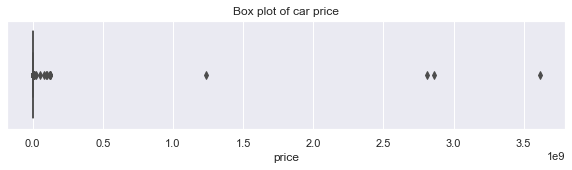

In [6]:
# visualize car prices distribution
fig, ax = plt.subplots(figsize=(10,2))
ax.set_title('Box plot of car price')
sns.boxplot(x='price', data = dataset)

#### There are some car prices that are so large that needs to be removed.

In [7]:
# remove outilers using interquartile range in terms of price colunm
init_size = dataset.count()['id']
q1 = dataset['price'].quantile(0.25)
q3 = dataset['price'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
dataset = dataset.loc[(dataset['price'] > fence_low) & (dataset['price'] < fence_high)]
filtered_size = dataset.count()['id']
print(init_size-filtered_size,'(', '{:.2f}'.format(100*(init_size-filtered_size)/init_size), '%',')', 'outliers removed from dataset')

12806 ( 2.79 % ) outliers removed from dataset


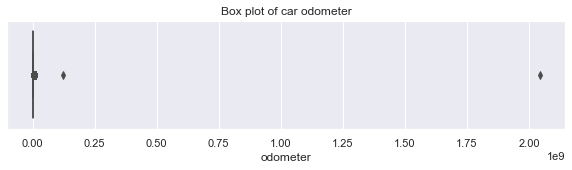

In [8]:
## For odometer we do the similiar things
fig, ax = plt.subplots(figsize=(10,2))
ax.set_title('Box plot of car odometer')
sns.boxplot(x='odometer', data = dataset)

#### Odometer near or equal to zero is fine since the car could be very new, but some odometry like 10*7 miles is not possible, so we need to remove outpilers as well. This time we set a higher boundary to accept more samples.

In [9]:
# remove outilers using interquartile range in terms of price colunm
init_size = dataset.count()['id']
q1 = dataset['odometer'].quantile(0.25)
q3 = dataset['odometer'].quantile(0.75)
iqr = q3 - q1
dataset = dataset.loc[(dataset['odometer'] <= q3 + 3 *iqr)]
filtered_size = dataset.count()['id']
print(init_size-filtered_size,'(', '{:.2f}'.format(100*(init_size-filtered_size)/init_size), '%',')', 'outliers removed from dataset')

55363 ( 12.43 % ) outliers removed from dataset


## 1.2. Drop uncorrelated columns

#### We only keep columns that have impact on car prices. 
#### There are some columns that are obviously unrelated with car price such as id, url, title_status, image_url, vin(vehicle identity number), description, region_url, region and county(since it is a null column). Since model car models can represent their manufacturers, so we can drop manufacturer as well.

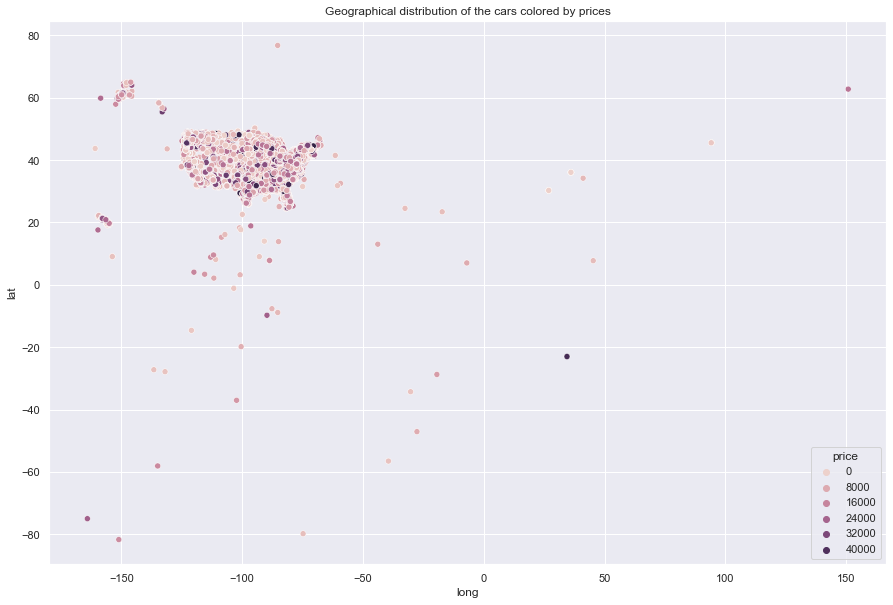

In [10]:
## determine how geographical coordinate affect car price
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Geographical distribution of the cars colored by prices')
sns.scatterplot(x= 'long', y='lat', data = dataset, hue = 'price', ax=ax )

#### We can see that the used car geographical distribution is concentrate on the U.S. However, the distribution of car prices are very random, no direct relationship between price and latitude or longtitude. Thus, we could drop these columns.

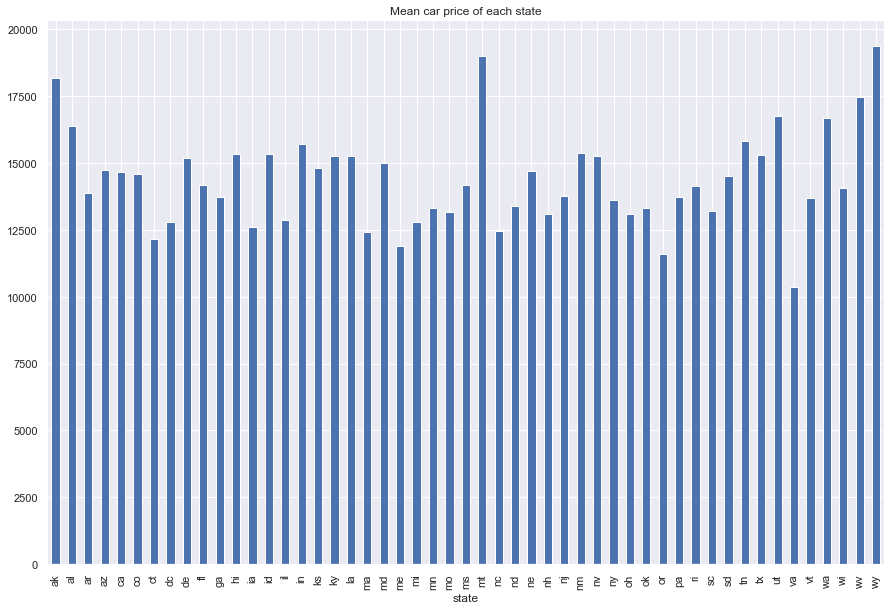

In [11]:
## determine how states affect car price
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Mean car price of each state')
dataset.groupby(['state']).mean()['price'].plot.bar(ax=ax)

#### We can see that state can affect car price to some extent, so we choose to keep this feature

In [12]:
# drop unnecessry columns
dataset = dataset.drop(columns = ['id', 'manufacturer', 'url', 'region', 'region_url', 'title_status', 'image_url', 'description', 'long', 'lat'])

## 1.3. Remove other impossible samples

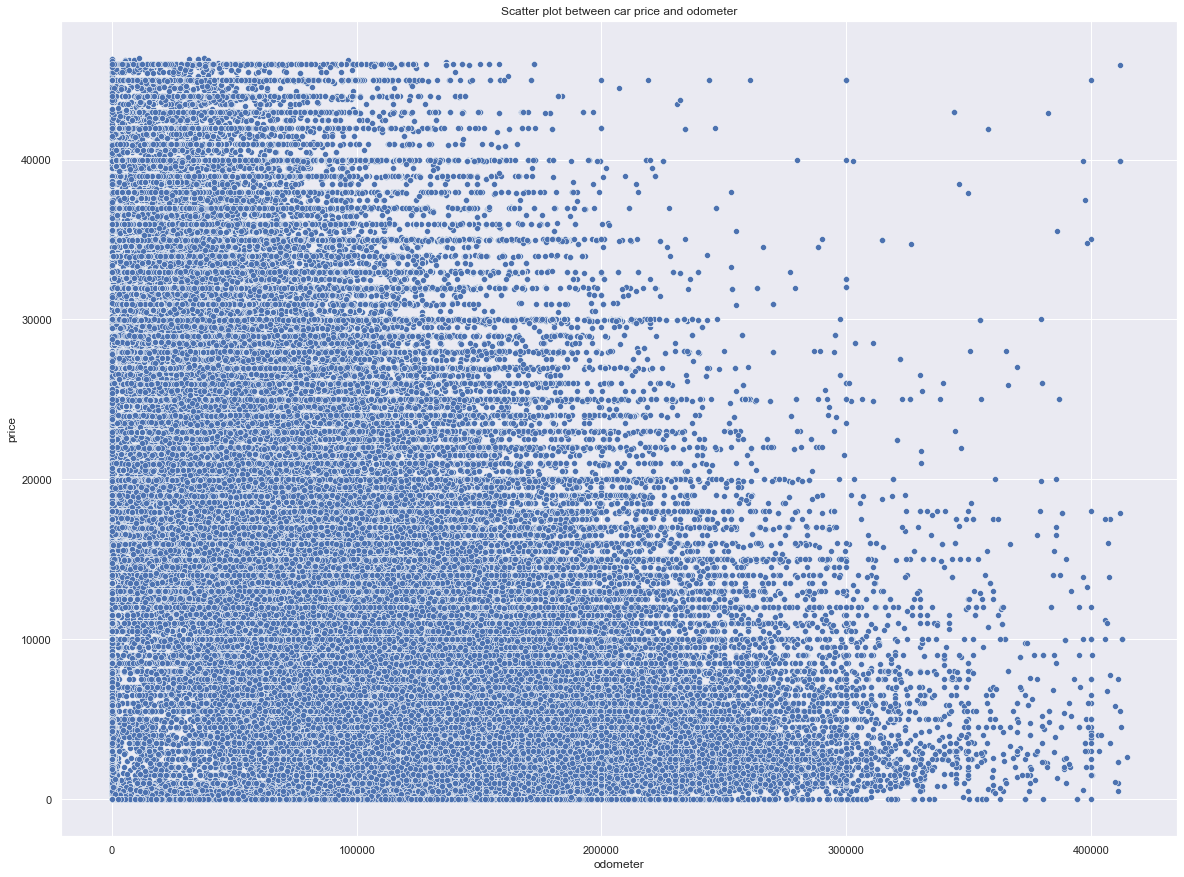

In [13]:
# visualize relationship between prices and odometer.
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot between car price and odometer')
sns.scatterplot(x='odometer', y='price', data=dataset)

In [14]:
# set a minimum threshold 1000 miles to make the car price reasonable
dataset = dataset[dataset['price']>1000]
# since the minimum car made year is 1900, car less than 1980 can cause too much uncertainty
dataset = dataset[dataset['year']>1980]
# # The cheapest new car is around 2000$, but here there are some with 1000$ around
# # so we set a boundary to the sum of price and odometer
dataset = dataset[(dataset['price']+dataset['odometer'])>2000]

## 1.4. Deal with missing samples.

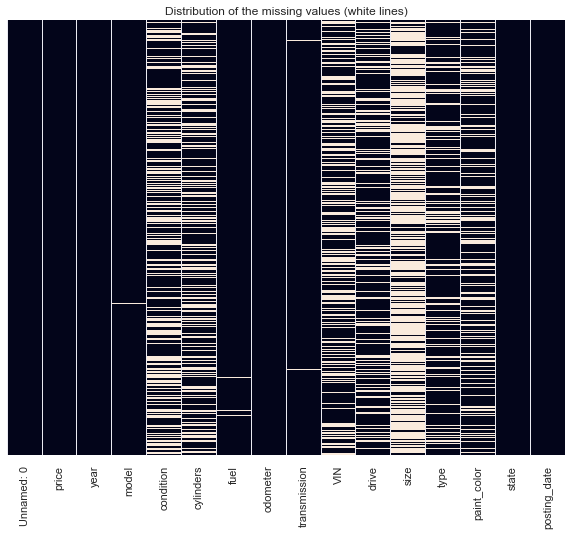

In [15]:
# visualize how missing values are distributed in each remained columns.
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Distribution of the missing values (white lines)')
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

#### We can see that 'size' has too many missing values, so we drop it.
#### For those columns that have very few missing values, we delete those rows.
#### Columns that have not too many and not too few missing values, we replace them with str 'null'.

In [16]:
# drop size column
dataset = dataset.drop(columns = ['size'])
# delete the rows for those columns that have very few null values
the_columns = ['price', 'year', 'model', 'fuel', 'transmission', 'odometer', 'drive', 'type', 'paint_color', 'state']
for i in the_columns:
    dataset = dataset[dataset[i].notnull()]
# replace missing values with str 'null'.
dataset = dataset.replace(np.nan, 'null', regex=True)


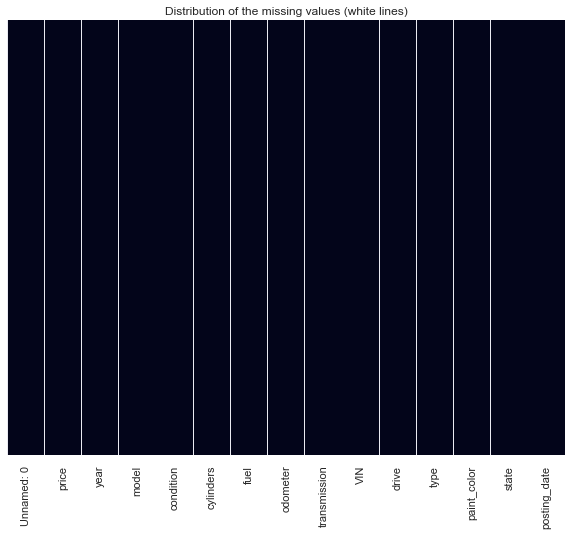

In [17]:
# visualize whether there are missing values
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Distribution of the missing values (white lines)')
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

## 1.5. Remove model with little samples

#### To get better results, we remove those rows with model number less than 10.

In [18]:
dataset['model'].value_counts()

f-150             3571
silverado 1500    2587
camry             1912
1500              1819
escape            1705
                  ... 
2007 Corvette        1
t 7500               1
xsport               1
civic lx-l           1
escape 4x4 suv       1
Name: model, Length: 16274, dtype: int64

In [19]:
dataset = dataset.groupby('model').filter(lambda x: len(x) > 10) 

In [20]:
dataset['model'].value_counts()

f-150                      3571
silverado 1500             2587
camry                      1912
1500                       1819
escape                     1705
                           ... 
a6 3.0t quattro              11
srx luxury                   11
sentra sl                    11
sentra sr fwd gas sedan      11
civic si sedan 4d            11
Name: model, Length: 2143, dtype: int64

## 1.6. Remove duplicate rows
### This could aviod overfitting and save computational time

In [21]:
dataset = dataset.drop_duplicates()

## 1.7. Store dataset after data cleaning 


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170007 entries, 4 to 458211
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    170007 non-null  int64  
 1   price         170007 non-null  int64  
 2   year          170007 non-null  float64
 3   model         170007 non-null  object 
 4   condition     170007 non-null  object 
 5   cylinders     170007 non-null  object 
 6   fuel          170007 non-null  object 
 7   odometer      170007 non-null  float64
 8   transmission  170007 non-null  object 
 9   VIN           170007 non-null  object 
 10  drive         170007 non-null  object 
 11  type          170007 non-null  object 
 12  paint_color   170007 non-null  object 
 13  state         170007 non-null  object 
 14  posting_date  170007 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 20.8+ MB


In [23]:
# store cleaned data
dataset.to_csv(r'./cleaned_df.csv', index = False)

# 2. Dataset Analysis

In [24]:
# Cleaned up dataset "./data/cleaned_df.csv" is used from then

dataset = pd.read_csv('./data/cleaned_df.csv', keep_default_na=False) #Avoid 'null' in CSV to be parsed as NaN 
dataset_na = pd.read_csv('./data/cleaned_df.csv')
dataset.head(3)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
0,13995,2012.0,ford,f-150,good,6 cylinders,gas,188406.0,automatic,4wd,truck,grey,mn
1,7995,2010.0,chevrolet,equinox,good,4 cylinders,gas,108124.0,automatic,4wd,SUV,grey,mn
2,8995,2011.0,chevrolet,traverse,good,6 cylinders,gas,178054.0,automatic,4wd,SUV,white,mn


## 2.1 Individual Variable Descriptions -- Histograms of Price, Year and Mileage

/Users/shane/anaconda3/envs/ECE202/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


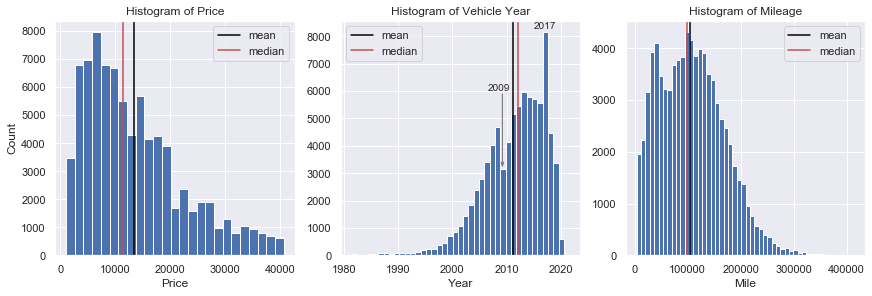

In [25]:
fig, ax = plt.subplots(1,3,figsize=(12,4), constrained_layout=True)
ax[0].hist(dataset['price'], 25)
ax[0].axvline(x=dataset['price'].mean(),color='black',label='mean')
ax[0].axvline(x=dataset['price'].median(),color='r',label='median')
ax[0].set_title('Histogram of Price'), ax[0].set_xlabel('Price'), ax[0].set_ylabel('Count')
ax[0].legend()

ax[1].hist(dataset['year'], len(dataset['year'].value_counts()), align='right')
ax[1].set_title('Histogram of Vehicle Year'), ax[1].set_xlabel('Year')
ax[1].arrow(2009.2,5900,0,-2500,head_width=0.5,head_length=150,color='gray')
ax[1].axvline(x=dataset['year'].mean(),color='black',label='mean')
ax[1].axvline(x=dataset['year'].median(),color='r',label='median')
ax[1].text(2017,8300,'2017',horizontalalignment='center')
ax[1].text(2008.5,6000,'2009',horizontalalignment='center')
ax[1].legend()

ax[2].hist(dataset['odometer'], 50, align='right')
ax[2].set_title('Histogram of Mileage'), ax[2].set_xlabel('Mile')
ax[2].axvline(x=dataset['odometer'].mean(),color='black',label='mean')
ax[2].axvline(x=dataset['odometer'].median(),color='r',label='median')
ax[2].legend()

fig.savefig('./plots/data_analysis/histograms.png')
fig.show()

## 2.2 Multivariate Analysis

### 2.2.1. Price vs. Odometer 

/Users/shane/anaconda3/envs/ECE202/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


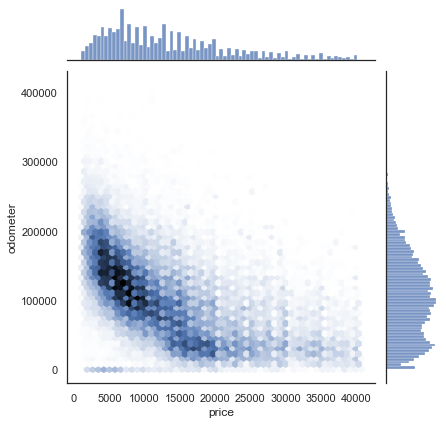

In [26]:
with sns.axes_style('white'):
    p_price = sns.jointplot('price', 'odometer', dataset, kind='hex')
plt.savefig('./plots/data_analysis/price_vs_odometer.png')

### 2.2.2. Price vs. Year 

/Users/shane/anaconda3/envs/ECE202/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


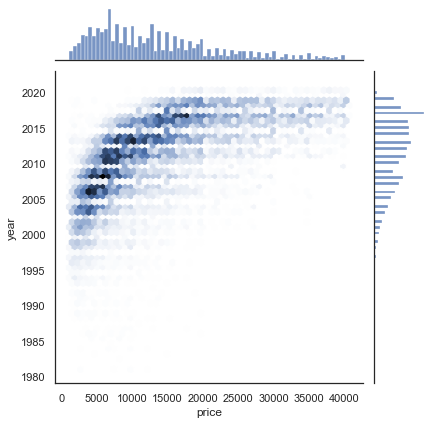

In [27]:
with sns.axes_style('white'):
    p_year = sns.jointplot('price', 'year', dataset, kind='hex')
    plt.savefig('./plots/data_analysis/price_vs_year.png')

### 2.2.3 Price and Odometer vs. Condition

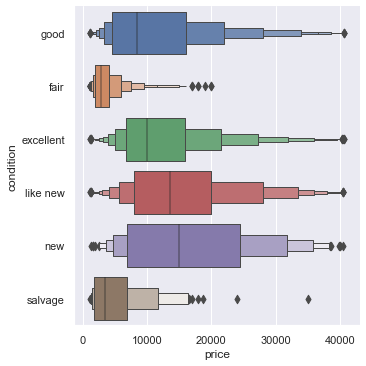

In [28]:
sns.catplot(x='price',y='condition',data=dataset_na[['price','condition']],kind='boxen')
plt.savefig('./plots/data_analysis/price_vs_condition.png')
plt.show()

### 2.2.4. Price vs. Vehicle Type

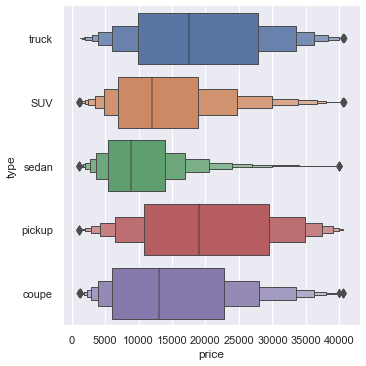

In [29]:
sns.catplot(x='price',y='type',data=dataset[['price','type']].loc[dataset['type'].isin(dataset['type'].value_counts().iloc[:5].index.tolist())],kind='boxen')
plt.savefig('./plots/data_analysis/price_vs_type.png')
plt.show()

### 2.2.5. Price vs. Paint Color

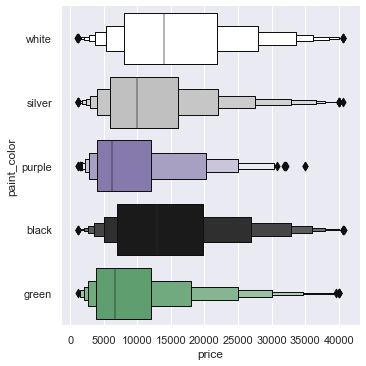

In [30]:
sns.catplot(x='price',y='paint_color',\
        data=dataset[['price','paint_color']].loc[dataset['paint_color'].isin(['white','black','silver','purple','green'])],\
        kind='boxen',\
        palette=sns.color_palette(['white','silver','m','k','g']))
plt.savefig('./plots/data_analysis/price_vs_color.png')
plt.show()

# 3. Prediction

In [31]:
df = pd.read_csv('./data/cleaned_df.csv', keep_default_na=False)
# add all the columns you want to dummy/one hot
onehot_these_columns = []
delete_these_columns = []
delete_these_columns.append('model')

buckets = False

if buckets:
    # Using buckets
    price_buckets = {}
    for k,v in dict(df.groupby("manufacturer")['price'].mean()).items():
        price_buckets[k] = int(v/5000)
    df['manufacturer'].replace(price_buckets, inplace=True)
    print("unique values after bucketing", df['manufacturer'].unique())
else:
    # Using onehot encoding
    onehot_these_columns.append("manufacturer")
    
onehot_these_columns.append("condition")

mean_cylinder = (4+6+8)/3

replace_cylinders = {'3 cylinders':3, '4 cylinders':4, '5 cylinders':5, 
           '6 cylinders':6, '8 cylinders':8, '10 cylinders':10, 
           '12 cylinders':12, 'null':mean_cylinder, 'other':mean_cylinder}

df['cylinders'].replace(replace_cylinders, inplace=True)

onehot_these_columns.append('fuel')
onehot_these_columns.append('transmission')
onehot_these_columns.append('drive')
onehot_these_columns.append('type')
onehot_these_columns.append('paint_color')


In [32]:
def set_graph_text_color(COLOR):
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR
    mpl.rcParams['legend.fontsize'] = 'large'
    mpl.rcParams['axes.titlesize'] = 18
    mpl.rcParams['legend.facecolor'] = 'cornflowerblue'

## 3.1 State Wise Differences

### 3.1.1 State Wise Mean Selling Price

Text(0.5, 1, 'State-wise Mean Selling Price')

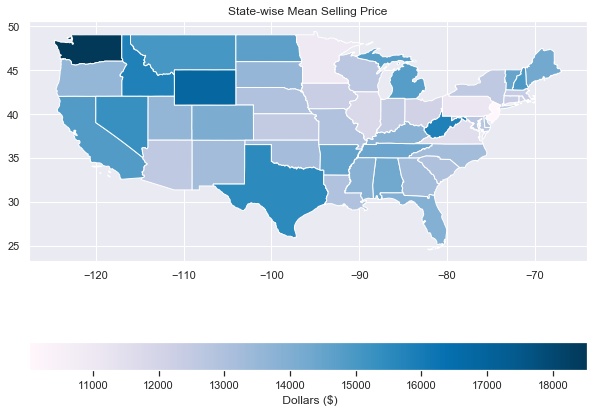

In [33]:
usa = geopandas.read_file("data/maps/cb_2018_us_state_20m.shp")

usa['STUSPS'] = usa['STUSPS'].str.lower()
usa = usa[(usa['STUSPS']!='ak') & (usa['STUSPS']!='hi')]

state_df = df.groupby('state')['price'].agg(['mean', 'count'])
state_df = usa.merge(state_df, right_on="state", left_on="STUSPS")

fig, ax = plt.subplots(1, 1,figsize=(10,10))
legend = {'label':" Dollars ($)", 'orientation': "horizontal"}
state_df.plot(column="mean", ax=ax, legend=True, legend_kwds=legend, cmap="PuBu")
plt.title("State-wise Mean Selling Price")

### 3.1.2 Mean Price comparison across different vahicle types (Minnesota vs Washington)

In [34]:
minnesota = df[df['state']=="mn"].groupby('type')['price'].agg(['mean','count'])
minnesota.rename(columns={"mean":"mn_mean","count":"mn_count"}, inplace=True)

washington = df[df['state']=="wa"].groupby('type')['price'].agg(['mean','count'])
washington.rename(columns={"mean":"wa_mean","count":"wa_count"}, inplace=True)

state_type_comp = minnesota.merge(washington, on="type", how="inner")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

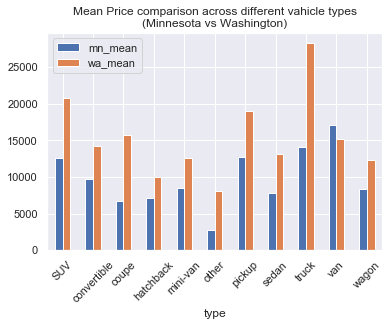

In [35]:
state_type_comp.plot(y=['mn_mean',"wa_mean"], kind="bar", 
                     title="Mean Price comparison across different vahicle types\n(Minnesota vs Washington)")
set_graph_text_color('black')
plt.xticks(rotation=45)

### 3.1.3 Mean Odometer comparison across different vahicle types (Minnesota vs Washington)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

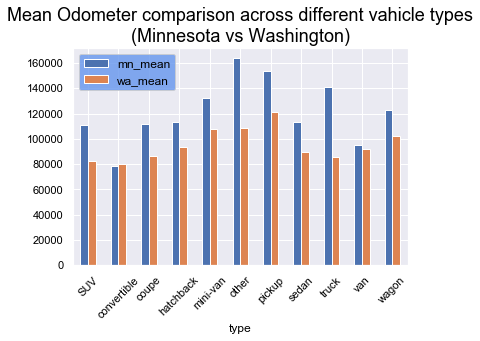

In [36]:
minnesota = df[df['state']=="mn"].groupby('type')['odometer'].agg(['mean','count'])
minnesota.rename(columns={"mean":"mn_mean","count":"mn_count"}, inplace=True)

washington = df[df['state']=="wa"].groupby('type')['odometer'].agg(['mean','count'])
washington.rename(columns={"mean":"wa_mean","count":"wa_count"}, inplace=True)

state_type_comp = minnesota.merge(washington, on="type", how="inner")

state_type_comp.plot(y=['mn_mean',"wa_mean"], kind="bar", 
                     title="Mean Odometer comparison across different vahicle types\n(Minnesota vs Washington)")
set_graph_text_color('black')
plt.xticks(rotation=45)

## 3.2 Correlation Graph

In [37]:
method = "bucket"
if method=="bucket":
    state_buckets = {}
    for k,v in dict(df.groupby("state")['price'].mean()).items():
        state_buckets[k] = int(v/1000)

    df['state'].replace(state_buckets, inplace=True)

elif method=="onehot":
    onehot_these_columns.append('state')
else:
    delete_these_columns.append('state')

df['year_count'] = df['year']-df['year'].min()
delete_these_columns.append('year')

df.drop(columns=delete_these_columns, axis=1, inplace=True)

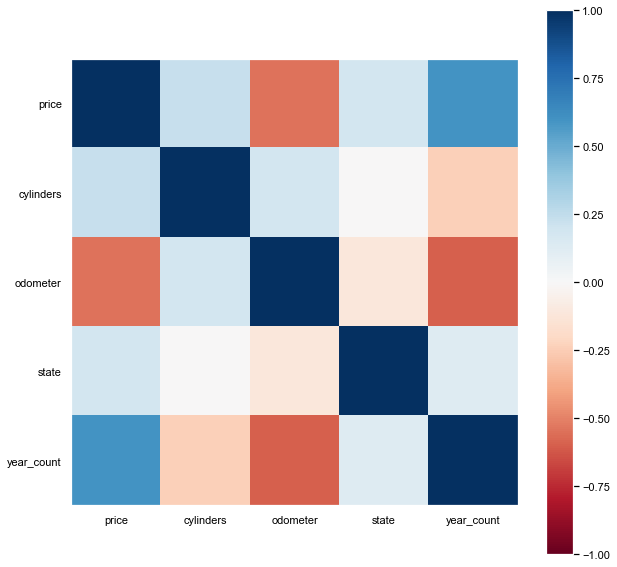

In [38]:
corr_matrix= df.corr()

fig_cor, axes_cor = plt.subplots(1,1)
fig_cor.set_size_inches(10, 10)

labels = df.select_dtypes(include=np.number).columns.tolist()

myimage = axes_cor.imshow(corr_matrix, cmap="RdBu", vmin=-1)
plt.colorbar(myimage)

axes_cor.set_xticks(np.arange(0,corr_matrix.shape[0], corr_matrix.shape[0]*1.0/len(labels)))
axes_cor.set_yticks(np.arange(0,corr_matrix.shape[1], corr_matrix.shape[1]*1.0/len(labels)))

axes_cor.set_xticklabels(labels)
axes_cor.set_yticklabels(labels)

axes_cor.grid(False)

plt.draw()

## 3.3 Model Comparison

In [39]:
df_dummy = pd.get_dummies(df, columns=onehot_these_columns)
model_results = dict()
model_names = ['Linear Regression', 'Extra Trees Regression', 
               'Bagging Regression', 'Ridge Regression', 'AdaBoost Regression', 
               'Decision Tree Regression']

y = df_dummy['price']
X = df_dummy.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, shuffle=True)

In [40]:
def loss_MSE(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)**0.5


# find whether our prediction is correct within a certain threshold
def accuracy(y_true, y_pred, thresh=100):
    return np.sum(np.where(abs(y_true-y_pred)<thresh, 1, 0)) / len(y_true)

def acc_r2(y_true, y_pred):
    return round(r2_score(y_true, y_pred) * 100, 2)

def printResults(model, y_train, y_test, y_pred_train, y_pred_test, threshold):
    mse_train = loss_MSE(y_train, y_pred_train)
    mse_test = loss_MSE(y_test, y_pred_test)
    acc_train = accuracy(y_train, y_pred_train, threshold)
    acc_test = accuracy(y_test, y_pred_test, threshold)
    r2_train = acc_r2(y_train, y_pred_train)
    r2_test = acc_r2(y_test, y_pred_test)
    # save results
    model_results[model] = [mse_train, mse_test, acc_train, acc_test, r2_train, r2_test]
    print("Loss MSE(Train): ", mse_train)
    print("Loss MSE(Test): ", mse_test)
    print("Accuracy with threshold =", threshold, "(Train):", acc_train)
    print("Accuracy with threshold =", threshold, "(Test):", acc_test)
    print("R2 Score(Train): ", r2_train)
    print("R2 Score(Test): ", r2_test)

In [41]:
threshold = 2000

### 3.3.1 Train Models

#### 3.3.1.1 Linear Regression

In [42]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)
printResults(model_names[0], y_train, y_test, y_pred_train, y_pred_test, threshold)

Loss MSE(Train):  4543.158229081127
Loss MSE(Test):  4528.010426508103
Accuracy with threshold = 2000 (Train): 0.3974726245615914
Accuracy with threshold = 2000 (Test): 0.41163715215034336
R2 Score(Train):  74.41
R2 Score(Test):  74.0


#### 3.3.1.2 Extra Trees Regression

In [43]:
model_etr = ExtraTreesRegressor(max_depth=18)
model_etr.fit(X_train, y_train)

y_pred_train = model_etr.predict(X_train)
y_pred_test = model_etr.predict(X_test)
printResults(model_names[1], y_train, y_test, y_pred_train, y_pred_test, threshold)

Loss MSE(Train):  1887.9057873388872
Loss MSE(Test):  3074.6739986472144
Accuracy with threshold = 2000 (Train): 0.8034323043559745
Accuracy with threshold = 2000 (Test): 0.6555836646187206
R2 Score(Train):  95.58
R2 Score(Test):  88.01


#### 3.3.1.3 Bagging Regression

In [44]:
model_bagging = BaggingRegressor()
model_bagging.fit(X_train, y_train)

y_pred_train = model_bagging.predict(X_train)
y_pred_test = model_bagging.predict(X_test)
printResults(model_names[2], y_train, y_test, y_pred_train, y_pred_test, threshold)

Loss MSE(Train):  1361.948233415541
Loss MSE(Test):  3228.915050797096
Accuracy with threshold = 2000 (Train): 0.8966962062595379
Accuracy with threshold = 2000 (Test): 0.6455848692928563
R2 Score(Train):  97.7
R2 Score(Test):  86.78


#### 3.3.1.4 Ridge Regression

In [45]:
model_rcv = RidgeCV()
model_rcv.fit(X_train, y_train)

y_pred_train = model_rcv.predict(X_train)
y_pred_test = model_rcv.predict(X_test)
printResults(model_names[3], y_train, y_test, y_pred_train, y_pred_test, threshold)

Loss MSE(Train):  4718.063459794932
Loss MSE(Test):  4700.121030521397
Accuracy with threshold = 2000 (Train): 0.3720516184305641
Accuracy with threshold = 2000 (Test): 0.3751355258402602
R2 Score(Train):  72.4
R2 Score(Test):  71.99


#### 3.3.1.5 AdaBoost Regression

In [46]:
model_adaboost = AdaBoostRegressor()
model_adaboost.fit(X_train, y_train)

y_pred_train = model_adaboost.predict(X_train)
y_pred_test = model_adaboost.predict(X_test)
printResults(model_names[4], y_train, y_test, y_pred_train, y_pred_test, threshold)

Loss MSE(Train):  5406.406686967764
Loss MSE(Test):  5399.27096780664
Accuracy with threshold = 2000 (Train): 0.2269149420363578
Accuracy with threshold = 2000 (Test): 0.23876641368509818
R2 Score(Train):  63.76
R2 Score(Test):  63.03


#### 3.3.1.6 Decision Tree Regression

In [47]:
model_dt = DecisionTreeRegressor(max_depth=15)
model_dt.fit(X_train, y_train)

y_pred_train = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)
printResults(model_names[5], y_train, y_test, y_pred_train, y_pred_test, threshold)

Loss MSE(Train):  2681.6474042272703
Loss MSE(Test):  3837.5856104486993
Accuracy with threshold = 2000 (Train): 0.690717785333726
Accuracy with threshold = 2000 (Test): 0.5853511625105409
R2 Score(Train):  91.08
R2 Score(Test):  81.32


### 3.3.2 Comparison of Models

In [48]:
mse_train = []
mse_test = []
acc_train = []
acc_test = []
r2_train = []
r2_test = []

for name in model_names:
    res = model_results[name]
    mse_train.append(res[0])
    mse_test.append(res[1])
    acc_train.append(res[2])
    acc_test.append(res[3])
    r2_train.append(res[4])
    r2_test.append(res[5])
    
models = pd.DataFrame({
    'model': model_names,
    'mse_train': mse_train,
    'mse_test': mse_test,
    'acc_train': acc_train,
    'acc_test': acc_test,
    'r2_train': r2_train,
    'r2_test': r2_test
                     })

#### 3.3.2.1 Mean Squared Error

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

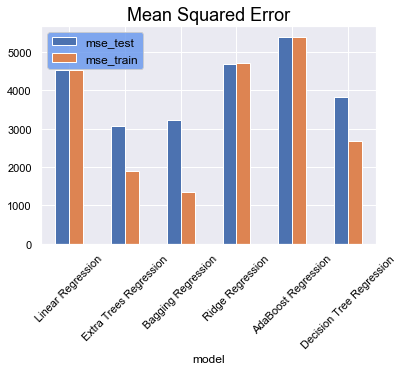

In [49]:
models.set_index('model')[['mse_test','mse_train']].plot(kind='bar', grid=True, title='Mean Squared Error')
plt.xticks(rotation=45)

#### 3.3.2.2 Accuracy with threshold = 2000

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

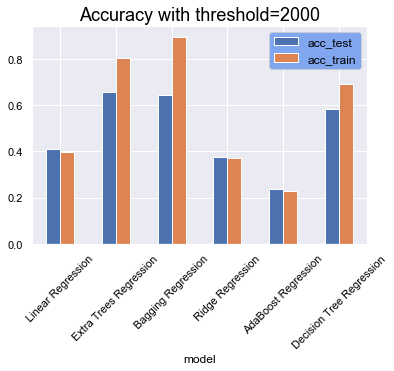

In [50]:
models.set_index('model')[['acc_test','acc_train']].plot(kind='bar', grid=True, title='Accuracy with threshold=2000')
set_graph_text_color('black')
plt.xticks(rotation=45)

#### 3.3.2.3 R2 Score

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

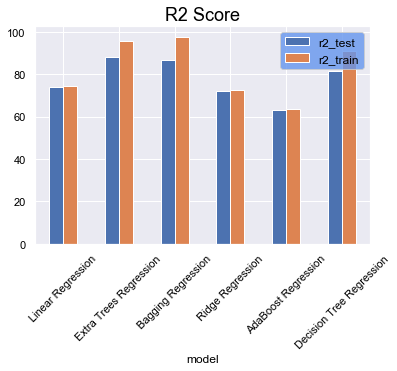

In [51]:
models.set_index('model')[['r2_test','r2_train']].plot(kind='bar', grid=True, title='R2 Score')
set_graph_text_color('black')
plt.xticks(rotation=45)

# 4. UI

Please see ReadMe to run our UI for this project.